### INSPECT DATASET FOR MISSING VALUES

**THE FIXED NUMBER OF OPTIONS: A SOLUTION TO THE VIX PROBLEM**

Andersen, Bondarenko & Gonzalez-Perez (2013) identify a new error source in VIX that generates a significant number of jumps in the volatility index unconnected with the underlying volatility process and that weakens the function of VIX as an annualized fair volatility index. This error source is related to the truncation error reported in Jiang & Tian (2005) but differs because it is generated by the CBOE rule that determines the minimum and maximum strikes considered in the volatility index formula (cutting-wings rule). After Andersen, Bondarenko & Gonzalez-Perez (2013) identify this additional error component, the CBOE added in the VIX white paper the following disclaimer: “as volatility rises and falls, the strike price range of options with nonzero bids tends to expand and contract. As a result, the number of options used in the VIX calculation may vary from month-to-month, day-to-day and possibly, even minuteto-minute.” Nevertheless, some adjustments or changes in the VIX formula should also be considered to reduce this deficiency. The literature basically suggests (i) to make the range of strikes economically invariant and compute the VIX as a Corridor Implied Volatility (CIV) index (see Andersen & Bondarenko (2007), Andersen & Bondarenko (2010), Andersen, Bondarenko & Gonzalez-Perez (2013)), or (ii) extrapolate option prices in the tails using implied volatility functions. Nevertheless, mispriced deep OTM options difficult the success of the extrapolation exercise.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
call30 = pd.read_csv('/home/student/surface/Realized Variance/DatasetSPX/New Interpolation/call30TimeInt_missing.csv')
put30 = pd.read_csv('/home/student/surface/Realized Variance/DatasetSPX/New Interpolation/put30TimeInt_missing.csv')

In [148]:
#Change Negative Price with ZERO
surfCall30 = call30[(call30.OTM_K <= 200) & (call30.OTM_K >= 5)].copy()
surfCall30.loc[surfCall30['mid_price']<0, 'mid_price'] = 0

put30['OTM_K'] = put30['ATM_strike'] - put30['strike_price'] 
#Change Negative Price with ZERO
surfPut30 = put30[(put30.OTM_K <= 200) & (put30.OTM_K >= 0)].copy()
surfPut30.loc[surfPut30['mid_price']<0, 'mid_price'] = 0

In [149]:
surfCall30['mid_price'] = surfCall30['mid_price'] #/(surfCall30['strike_price']*surfCall30['strike_price'])*100000
surfCall30 = surfCall30.pivot('date','OTM_K','mid_price').copy()
surfPut30 = surfPut30.pivot('date','OTM_K','mid_price').copy()
surfPut30.fillna(0,inplace=True)

In [150]:
max = 100
surfCall30[range(5,max,5)]

OTM_K,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,60.0,65.0,70.0,75.0,80.0,85.0,90.0,95.0
date,,,,,,,,,,,,,,,,,,,
19960104,4.812500,3.046875,2.000000,1.328125,0.718750,0.328125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
19960105,5.785714,3.897321,2.553571,1.642857,1.055804,0.677455,0.411830,0.146205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
19960108,4.787946,3.256696,2.022321,1.191964,0.716518,0.464286,0.212054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
19960109,5.669643,3.609375,2.051339,1.981027,1.217634,0.666295,0.539062,0.328125,0.117188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
19960110,5.767857,4.107143,3.017857,1.955357,1.258929,0.785714,0.455357,0.276786,0.232143,0.187500,0.142857,0.098214,0.053571,0.008929,0.000000,0.000000,0.000000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171222,20.733333,17.850000,15.316667,12.916667,10.700000,8.883333,7.250000,5.916667,4.683333,3.741667,2.991667,2.308333,1.858333,1.483333,1.183333,0.950000,0.750000,0.633333,0.525
20171226,24.925000,21.825000,18.975000,16.325000,13.900000,11.725000,9.775000,8.050000,6.575000,5.250000,4.200000,3.362500,2.675000,2.112500,1.687500,1.350000,1.087500,0.887500,0.725
20171227,20.950000,18.050000,15.350000,12.950000,10.750000,8.800000,7.100000,5.650000,4.450000,3.550000,2.750000,2.150000,1.700000,1.325000,1.075000,0.875000,0.725000,0.625000,0.525


In [154]:
list_call =[]
for i in range(5,205,5):
    count = len(surfCall30[(surfCall30[i]==0)])
    list_call.append([i,count])

list_put =[]
for i in range(5,205,5):
    count = len(surfPut30[(surfPut30[i]==0)])
    list_put.append([-i,count])

#list_call.append(list_put)

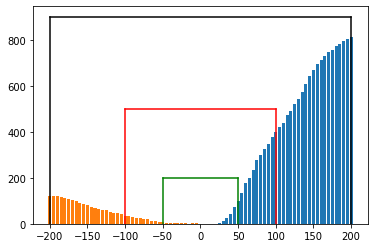

In [178]:
#Plot the Cumulative number of negative (null) mid_price occurrance based on the range of Strike_Price included in the dataset
plt.bar([item[0] for item in list_call],[item[1] for item in list_call],width=4)
plt.bar([item[0] for item in list_put],[item[1] for item in list_put],width=4)
plt.plot([-200,-200],[0,900], color='k')
plt.plot([200,200],[0,900], color='k')
plt.plot([-200,200],[900,900], color='k')
plt.plot([-100,-100],[0,500], color='r')
plt.plot([100,100],[0,500], color='r')
plt.plot([-100,100],[500,500], color='r')
plt.plot([-50,-50],[0,200], color='g')
plt.plot([50,50],[0,200], color='g')
plt.plot([-50,50],[200,200], color='g')

In [28]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

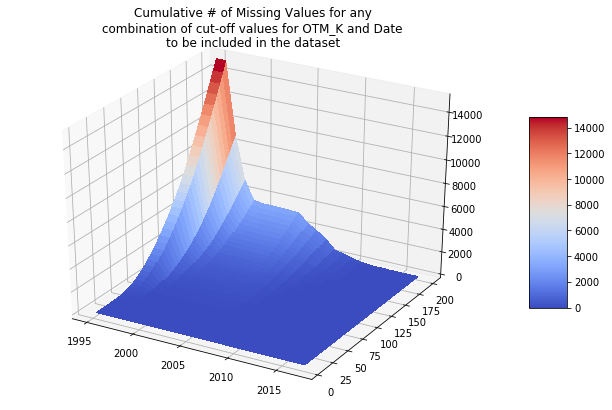

How to look at the chart: choose a point (your_date,max_strike) and by restricting the dataset to date>your date and strike<max_strike you will have the z-axis number of missing observation. The looser the constrain (i.e. the larger the dataset) the bigger the number of missing values


In [32]:
def count_missing(year,OTM_K):
    count = 0
    for i in range(5, OTM_K, 5):
            count = count + len(surfCall30[(surfCall30[i]==0) & (surfCall30.index>year*10000)]) 
    return count

count_missing = np.vectorize(count_missing)

fig = plt.figure(figsize=(11,7))
ax = fig.gca(projection='3d')
# Make data.
year = np.arange(1995, 2018, 1)
OTM_K = np.arange(5, 205, 5)
X, Y = np.meshgrid(year, OTM_K)
Z = count_missing(X,Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Cumulative # of Missing Values for any\ncombination of cut-off values for OTM_K and Date\nto be included in the dataset')
plt.show()

print('How to look at the chart: choose a point (your_date,max_strike) and by restricting the dataset to date>your date and strike<max_strike you will have the z-axis number of missing observation. The looser the constrain (i.e. the larger the dataset) the bigger the number of missing values')

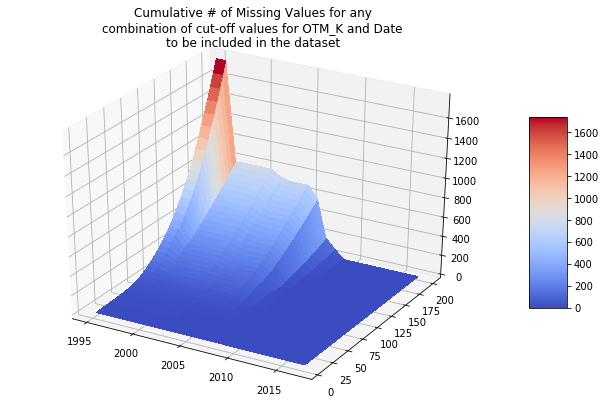

How to look at the chart: choose a point (your_date,max_strike) and by restricting the dataset to date>your date and strike<max_strike you will have the z-axis number of missing observation. The looser the constrain (i.e. the larger the dataset) the bigger the number of missing values


In [97]:
def count_missing(year,OTM_K):
    count = 0
    for i in range(5, OTM_K, 5):
            count = count + len(surfPut30[(surfPut30[i]<=0) & (surfPut30.index>year*10000)]) 
    return count

count_missing = np.vectorize(count_missing)

fig = plt.figure(figsize=(11,7))
ax = fig.gca(projection='3d')
# Make data.
year = np.arange(1995, 2018, 1)
OTM_K = np.arange(5, 205, 5)
X, Y = np.meshgrid(year, OTM_K)
Z = count_missing(X,Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Cumulative # of Missing Values for any\ncombination of cut-off values for OTM_K and Date\nto be included in the dataset')
plt.show()

print('How to look at the chart: choose a point (your_date,max_strike) and by restricting the dataset to date>your date and strike<max_strike you will have the z-axis number of missing observation. The looser the constrain (i.e. the larger the dataset) the bigger the number of missing values')

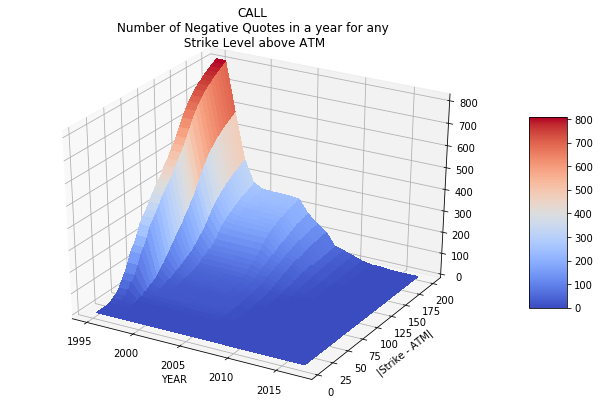

How to look at the chart: choose a point (your_date,max_strike) and by restricting the dataset to date>your date and strike<max_strike you will have the z-axis number of missing observation. The looser the constrain (i.e. the larger the dataset) the bigger the number of missing values


In [201]:
def count_missing(year,OTM_K):
     count = len(surfCall30[(surfCall30[OTM_K]<=0) & (surfCall30.index>year*10000)]) 
     return count

count_missing = np.vectorize(count_missing)

fig = plt.figure(figsize=(11,7))
ax = fig.gca(projection='3d')
# Make data.
year = np.arange(1995, 2018, 1)
OTM_K = np.arange(5, 205, 5)
X, Y = np.meshgrid(year, OTM_K)
Z = count_missing(X,Y)
plt.xlabel('YEAR')
plt.ylabel('|Strike - ATM|')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('CALL\nNumber of Negative Quotes in a year for any\n Strike Level above ATM')
plt.show()

print('How to look at the chart: choose a point (your_date,max_strike) and by restricting the dataset to date>your date and strike<max_strike you will have the z-axis number of missing observation. The looser the constrain (i.e. the larger the dataset) the bigger the number of missing values')

OTM_K,0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,...,155.0,160.0,165.0,170.0,175.0,180.0,185.0,190.0,195.0,200.0
date,,,,,,,,,,,,,,,,,,,,,
19960104,8.500000,6.687500,5.250000,3.875000,2.875000,2.437500,1.937500,1.656250,1.328125,1.093750,...,0.112500,1.062500e-01,0.100000,0.093750,0.087500,8.125000e-02,0.075000,0.068750,0.062500,0.056250
19960105,6.654018,4.986607,3.775670,2.805804,2.344866,1.860491,1.524554,1.284598,1.107143,0.881696,...,0.121853,1.150000e-01,0.108147,0.101295,0.094442,8.758929e-02,0.080737,0.073884,0.067031,0.060179
19960108,7.227679,5.357143,4.026786,3.058036,2.372768,2.013393,1.555804,1.270089,0.966518,0.843750,...,0.099152,9.392857e-02,0.088705,0.083482,0.078259,7.303571e-02,0.067812,0.062589,0.057366,0.052143
19960109,10.696429,8.180804,7.424107,5.209821,4.745536,3.354911,2.830357,2.022321,1.803571,1.448661,...,0.138304,1.285714e-01,0.118839,0.109107,0.099375,8.964286e-02,0.079911,0.070179,0.060446,0.050714
19960110,9.428571,6.982143,5.723214,4.589286,3.642857,2.946429,2.616071,2.116071,1.803571,1.500000,...,0.211786,1.954464e-01,0.179107,0.162768,0.146429,1.300893e-01,0.113750,0.097411,0.081071,0.064732
19960111,8.656250,6.578125,5.062500,3.960938,3.054688,2.617188,2.109375,1.562500,1.273438,1.070312,...,0.185938,1.751563e-01,0.164375,0.153594,0.142813,1.320312e-01,0.121250,0.110469,0.099687,0.088906
19960112,6.450893,4.928571,3.861607,3.093750,2.345982,1.870536,1.618304,1.212054,0.921875,0.946429,...,-2.441964,-2.595982e+00,-2.750000,-2.904018,-3.058036,-3.212054e+00,-3.366071,-3.520089,-3.674107,-3.828125
19960115,7.935268,6.097098,4.772321,3.881696,3.017857,2.558036,2.004464,1.631696,1.237723,1.025112,...,-3.652344,-3.864955e+00,-4.077567,-4.290179,-4.502790,-4.715402e+00,-4.928013,-5.140625,-5.353237,-5.565848
19960116,8.133929,6.401786,5.000000,3.921875,2.921875,2.216518,1.921875,1.515625,1.162946,0.963170,...,-3.431920,-3.631696e+00,-3.831473,-4.031250,-4.231027,-4.430804e+00,-4.630580,-4.830357,-5.030134,-5.229911


ValueError: shape mismatch: objects cannot be broadcast to a single shape

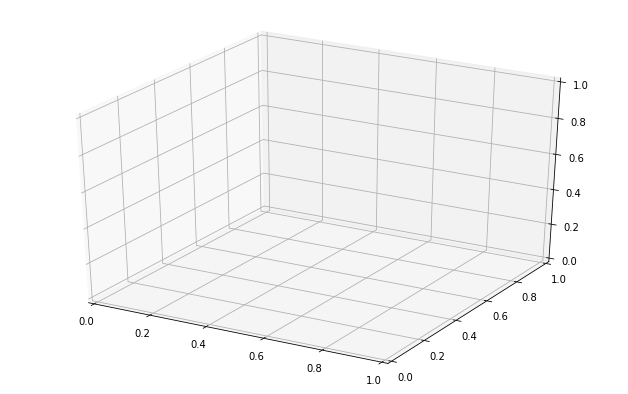

OTM_K,0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,...,155.0,160.0,165.0,170.0,175.0,180.0,185.0,190.0,195.0,200.0
date,,,,,,,,,,,,,,,,,,,,,
19960118,8.5,6.3125,4.9375,3.875000,2.75,2.25,1.875,1.5,1.125,0.875,...,-0.015625,-0.03125,-0.046875,-0.0625,-0.078125,-0.09375,-0.109375,-0.125,-0.140625,-0.15625
20010615,0.0,0.0000,0.0000,0.000000,0.00,0.00,0.000,0.0,0.000,0.000,...,0.000000,0.00000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000,0.000000,0.00000
20071121,0.0,0.0000,0.0000,33.143103,0.00,0.00,0.000,0.0,0.000,0.000,...,0.000000,0.00000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000,0.000000,0.00000
